In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


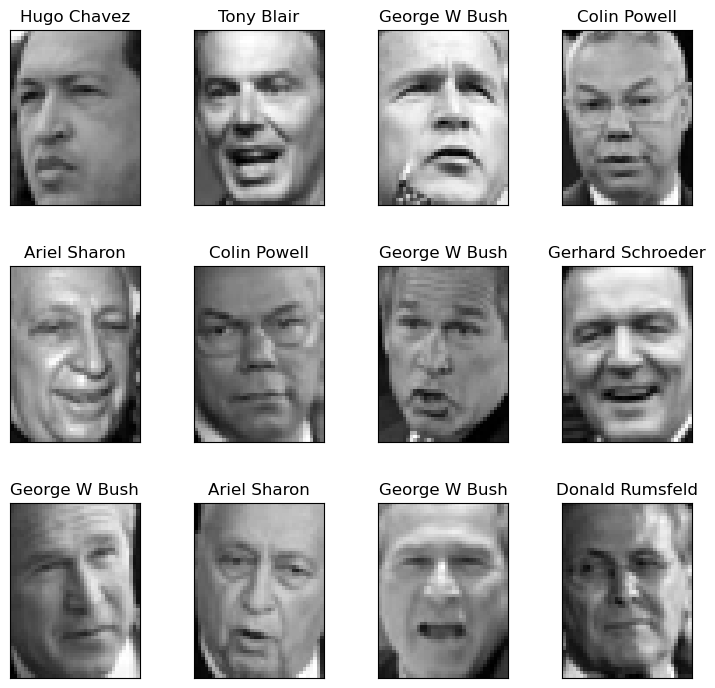

In [2]:
# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Visualize a sample of the dataset
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Get the shape of the images
n_samples, h, w = lfw_people.images.shape

# Plot a sample of the images with their labels
plot_gallery(lfw_people.images, target_names[y], h, w)

plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# Apply PCA for feature extraction and dimensionality reduction
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_pca)

# Print classification results
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

                   precision    recall  f1-score   support

     Ariel Sharon       0.40      0.15      0.22        13
     Colin Powell       0.48      0.47      0.47        60
  Donald Rumsfeld       0.50      0.26      0.34        27
    George W Bush       0.66      0.79      0.72       146
Gerhard Schroeder       0.26      0.24      0.25        25
      Hugo Chavez       0.50      0.07      0.12        15
       Tony Blair       0.38      0.47      0.42        36

         accuracy                           0.55       322
        macro avg       0.45      0.35      0.36       322
     weighted avg       0.53      0.55      0.52       322

Accuracy: 0.55


In [4]:
# Access the weak learners
weak_learners = clf.estimators_
print("Weak Learners:")
print(weak_learners)

# Access feature importances
feature_importances = clf.feature_importances_
print("\nFeature Importances:")
print(feature_importances)

# Access classifier weights
classifier_weights = clf.estimator_weights_
print("\nClassifier Weights:")
print(classifier_weights)

# Access classifier error rates
classifier_errors = clf.estimator_errors_
print("\nClassifier Error Rates:")
print(classifier_errors[classifier_errors>0.8])

Weak Learners:
[DecisionTreeClassifier(max_depth=1, random_state=490042154), DecisionTreeClassifier(max_depth=1, random_state=1870493290), DecisionTreeClassifier(max_depth=1, random_state=249371890), DecisionTreeClassifier(max_depth=1, random_state=1910869239), DecisionTreeClassifier(max_depth=1, random_state=2060370520), DecisionTreeClassifier(max_depth=1, random_state=1525505161), DecisionTreeClassifier(max_depth=1, random_state=1033206458), DecisionTreeClassifier(max_depth=1, random_state=418072727), DecisionTreeClassifier(max_depth=1, random_state=2142529618), DecisionTreeClassifier(max_depth=1, random_state=1545811851), DecisionTreeClassifier(max_depth=1, random_state=1075545732), DecisionTreeClassifier(max_depth=1, random_state=1462405979), DecisionTreeClassifier(max_depth=1, random_state=600145773), DecisionTreeClassifier(max_depth=1, random_state=1279836742), DecisionTreeClassifier(max_depth=1, random_state=2131772325), DecisionTreeClassifier(max_depth=1, random_state=121240484